**To predict Behavioral Intention (BI) of shopping based on**

* Demographics + TPB model (Full Model)

* TPB factors only (Attitudes, Norms, Control, Desire, Anxiety).

**1. Data Loading and Cleaning**
* Loaded the Excel file and skipped the first metadata row.

* Renamed the first 29 columns to meaningful names like Age, AT_1, SN_1, etc

**2. Numeric Conversion**
* Converted Likert-scale items (AT_1 to BI_4) to numeric.

* Created a new target column BI as the average of the four behavioral intention questions.


**3. Demographic Encoding**
* Categorical values like "36 - 45 years" were converted into numeric labels using LabelEncoder.

* This made the dataset fully numeric — a requirement for regression.


**4. Feature Selection**
Used the following as independent variables (X):

* Demographics: Age, Education, Occupation, Marital_Status, Income

* TPB Factors: AT, SN, PBC, SA, DE

**Target (y) = BI (mean of BI_1 to BI_4)**


**5. Train-Test Split**
Split 427 total rows into:

* 80% for training

* 20% for testing

**6. Model Training**
***Trained a linear regression model using sklearn.***

**7. Evaluation**
* **R² Score** = **0.333** → The model explains 33.3% of the variation in behavioral intention.

* **RMSE**= **0.295** → The average prediction error is about 0.3 points on a Likert scale (1–5).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:



# Load data
file_path = "/kaggle/input/minangkabau-women-shopping-behavior/Minangkabau Women Shopping Behavior Dataset-Source data 427 (Questionaire Answers).xlsx"
df_raw = pd.read_excel(file_path, sheet_name="Sheet1")

#  Remove header row and reset
df = df_raw.iloc[1:].reset_index(drop=True)

#  Rename first 29 useful columns
column_names = [
    'Age', 'Education', 'Occupation', 'Marital_Status', 'Income',
    'AT_1', 'AT_2', 'AT_3',
    'SN_1', 'SN_2', 'SN_3', 'SN_4',
    'PBC_1', 'PBC_2', 'PBC_3',
    'SA_1', 'SA_2', 'SA_3', 'SA_4', 'SA_5',
    'DE_1', 'DE_2', 'DE_3', 'DE_4',
    'BI_1', 'BI_2', 'BI_3', 'BI_4'
]
df.columns = column_names + list(df.columns[len(column_names):])
df = df[column_names]

#  Convert TPB & BI items to numeric
for col in column_names[5:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create BI score (target variable)
df['BI'] = df[['BI_1', 'BI_2', 'BI_3', 'BI_4']].mean(axis=1)

#  Label encode demographic features
categorical_columns = ['Age', 'Education', 'Occupation', 'Marital_Status', 'Income']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

#  Define features
features = categorical_columns + [
    'AT_1', 'AT_2', 'AT_3',
    'SN_1', 'SN_2', 'SN_3', 'SN_4',
    'PBC_1', 'PBC_2', 'PBC_3',
    'SA_1', 'SA_2', 'SA_3', 'SA_4', 'SA_5',
    'DE_1', 'DE_2', 'DE_3', 'DE_4'
]

#  Drop nulls (if any)
df = df.dropna(subset=features + ['BI'])

#  Split data
X = df[features]
y = df['BI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.3f}")


R2 Score: 0.333
RMSE: 0.295


# Regression coefficients showing the impact of demographics and TPB factors on shopping intention. Positive values increase intention; negative values reduce it.

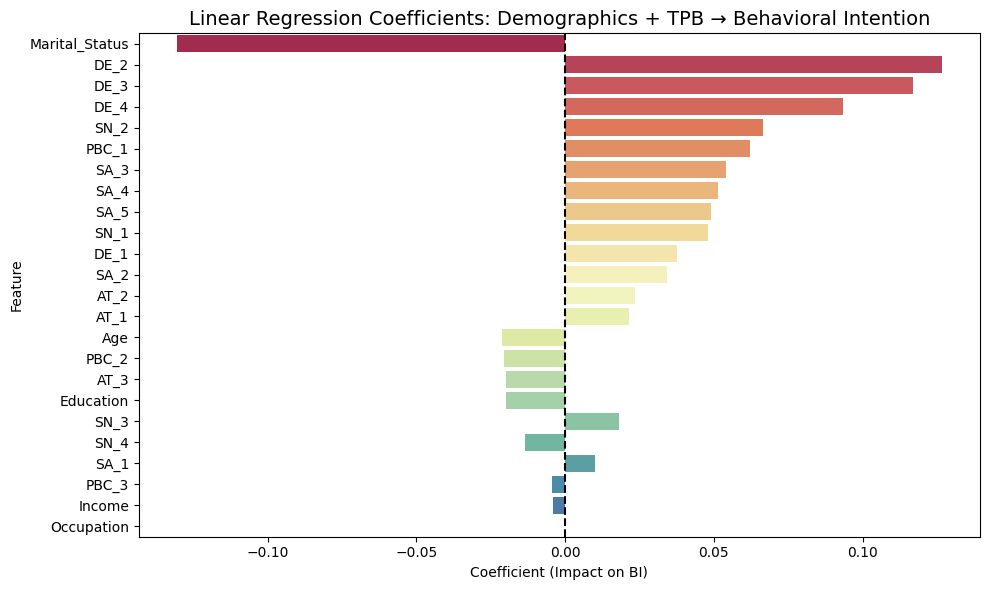

(           Feature  Coefficient
 0              Age    -0.021118
 1        Education    -0.019693
 2       Occupation     0.000086
 3   Marital_Status    -0.130428
 4           Income    -0.003938
 5             AT_1     0.021594
 6             AT_2     0.023523
 7             AT_3    -0.019878
 8             SN_1     0.048008
 9             SN_2     0.066514
 10            SN_3     0.018010
 11            SN_4    -0.013305
 12           PBC_1     0.062162
 13           PBC_2    -0.020526
 14           PBC_3    -0.004304
 15            SA_1     0.010216
 16            SA_2     0.034325
 17            SA_3     0.053923
 18            SA_4     0.051392
 19            SA_5     0.048959
 20            DE_1     0.037699
 21            DE_2     0.126603
 22            DE_3     0.116932
 23            DE_4     0.093444,
 None,
 None)

In [3]:
# Extract and build the coefficient DataFrame
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

# Sort all coefficients by absolute value (magnitude of influence)
coef_df_sorted = coef_df.sort_values(by='Coefficient', key=lambda x: x.abs(), ascending=False)

# Identify top 5 positive and negative influencers
top_positive = coef_df.sort_values(by='Coefficient', ascending=False).head(5)
top_negative = coef_df.sort_values(by='Coefficient', ascending=True).head(5)
top_combined = pd.concat([top_positive, top_negative])

# Plot all features sorted by absolute coefficient
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df_sorted, x='Coefficient', y='Feature', palette='Spectral')
plt.title("Linear Regression Coefficients: Demographics + TPB → Behavioral Intention", fontsize=14)
plt.xlabel("Coefficient (Impact on BI)")
plt.ylabel("Feature")
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

# Prepare outputs for textual summary
top_positive_values = top_positive[['Feature', 'Coefficient']]
top_negative_values = top_negative[['Feature', 'Coefficient']]

# Return the summary for printing
top_positive_values, top_negative_values, r2_tpb, rmse_tpb = None, None, None, None  # to define for final part
coef_df, top_positive_values, top_negative_values


# Actual vs Predicted BI Plot ( Full Model)

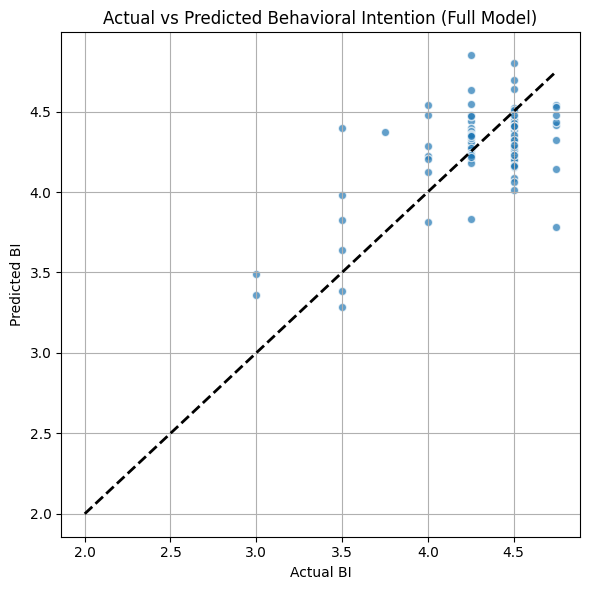

Top 5 Most Influential Features (Full Model):
       Feature  Coefficient
Marital_Status    -0.130428
          DE_2     0.126603
          DE_3     0.116932
          DE_4     0.093444
          SN_2     0.066514


(0.4159900210124996, 0.2761851006170614)

In [4]:
import matplotlib.pyplot as plt

# 1. Plot Actual vs Predicted BI values for the full model
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual BI')
plt.ylabel('Predicted BI')
plt.title('Actual vs Predicted Behavioral Intention (Full Model)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Show top 5 most influential features (by absolute coefficient)
top_5_influential = coef_df.sort_values(by='Coefficient', key=abs, ascending=False).head(5)

# 3. Train a new model using only TPB-related features (excluding demographics)
tpb_features = [
    'AT_1', 'AT_2', 'AT_3',
    'SN_1', 'SN_2', 'SN_3', 'SN_4',
    'PBC_1', 'PBC_2', 'PBC_3',
    'SA_1', 'SA_2', 'SA_3', 'SA_4', 'SA_5',
    'DE_1', 'DE_2', 'DE_3', 'DE_4'
]

X_tpb = df[tpb_features]
y_tpb = df['BI']

X_tpb_train, X_tpb_test, y_tpb_train, y_tpb_test = train_test_split(X_tpb, y_tpb, test_size=0.2, random_state=42)

model_tpb = LinearRegression()
model_tpb.fit(X_tpb_train, y_tpb_train)

y_tpb_pred = model_tpb.predict(X_tpb_test)
r2_tpb = r2_score(y_tpb_test, y_tpb_pred)
rmse_tpb = mean_squared_error(y_tpb_test, y_tpb_pred, squared=False)

print("Top 5 Most Influential Features (Full Model):")
print(top_5_influential.to_string(index=False))


r2_tpb, rmse_tpb


* The scatter plot compares actual BI scores vs predicted scores from the full model (demographics + TPB).

* The dashed line represents a perfect prediction line.

*  Most points are clustered around the line, showing decent model performance.

Top 5 Most Influential Features (By Absolute Coefficient Value):
- Marital_Status: Coefficient = -0.130 → This decreases Behavioral Intention
- DE_2: Coefficient = 0.127 → This increases Behavioral Intention
- DE_3: Coefficient = 0.117 → This increases Behavioral Intention
- DE_4: Coefficient = 0.093 → This increases Behavioral Intention
- SN_2: Coefficient = 0.067 → This increases Behavioral Intention


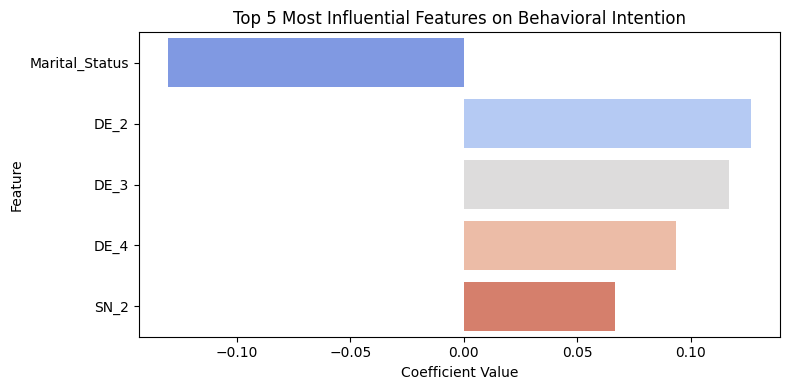

In [5]:
# Get the top 5 most influential features based on absolute coefficient value
top_5_influential = coef_df.copy()
top_5_influential['Abs_Coefficient'] = top_5_influential['Coefficient'].abs()
top_5_influential = top_5_influential.sort_values(by='Abs_Coefficient', ascending=False).head(5)

# Display them
print("Top 5 Most Influential Features (By Absolute Coefficient Value):")
for i, row in top_5_influential.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    direction = "increases" if coef > 0 else "decreases"
    print(f"- {feature}: Coefficient = {coef:.3f} → This {direction} Behavioral Intention")

# Optional: visualize
plt.figure(figsize=(8, 4))
sns.barplot(data=top_5_influential, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Top 5 Most Influential Features on Behavioral Intention")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


**What Does “Top 5 Most Influential Features” Mean?**
In linear regression, each feature (or variable) is assigned a coefficient. This number tells us:

* How much that feature influences the target (here, Behavioral Intention = BI)

* Whether the influence is positive or negative

* The larger the absolute value of the coefficient, the more influence that feature has.

So, the top 5 most influential features are simply the ones with the highest magnitude coefficients, either strongly increasing or decreasing shopping intention.

# Actual vs Predicted BI Plot ( Only TPB Model)

TPB-Only Model Performance:
R² Score: 0.416
RMSE: 0.276


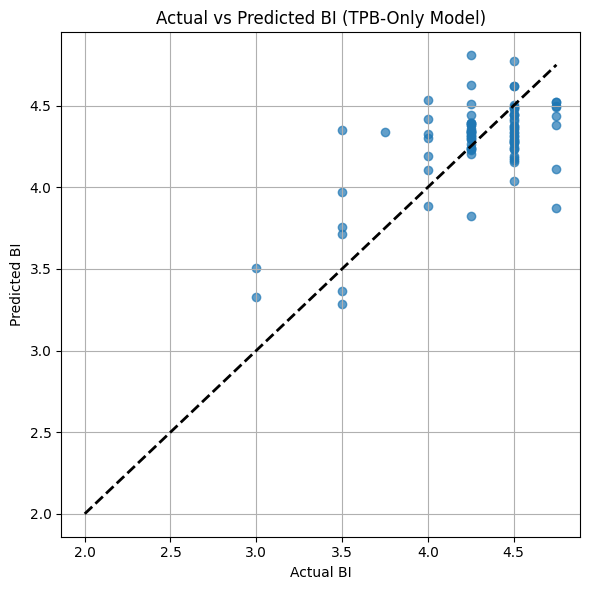

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define only TPB features (no demographics)
tpb_features = [
    'AT_1', 'AT_2', 'AT_3',
    'SN_1', 'SN_2', 'SN_3', 'SN_4',
    'PBC_1', 'PBC_2', 'PBC_3',
    'SA_1', 'SA_2', 'SA_3', 'SA_4', 'SA_5',
    'DE_1', 'DE_2', 'DE_3', 'DE_4'
]

# 2. Create feature matrix and target
X_tpb = df[tpb_features]
y_tpb = df['BI']

# 3. Train/test split
X_tpb_train, X_tpb_test, y_tpb_train, y_tpb_test = train_test_split(X_tpb, y_tpb, test_size=0.2, random_state=42)

# 4. Train linear regression model
model_tpb = LinearRegression()
model_tpb.fit(X_tpb_train, y_tpb_train)

# 5. Predict and evaluate
y_tpb_pred = model_tpb.predict(X_tpb_test)
r2_tpb = r2_score(y_tpb_test, y_tpb_pred)
rmse_tpb = mean_squared_error(y_tpb_test, y_tpb_pred, squared=False)

print("TPB-Only Model Performance:")
print(f"R² Score: {r2_tpb:.3f}")
print(f"RMSE: {rmse_tpb:.3f}")

# 6. Plot Actual vs Predicted for TPB model
plt.figure(figsize=(6, 6))
plt.scatter(y_tpb_test, y_tpb_pred, alpha=0.7)
plt.plot([y_tpb.min(), y_tpb.max()], [y_tpb.min(), y_tpb.max()], 'k--', lw=2)
plt.xlabel("Actual BI")
plt.ylabel("Predicted BI")
plt.title("Actual vs Predicted BI (TPB-Only Model)")
plt.grid(True)
plt.tight_layout()
plt.show()


This TPB-only model helps test whether internal psychological factors alone can predict shopping behavior, which is important for theory-driven models like TPB. If performance is strong, it suggests interventions (ads, messages, awareness) should target thoughts, feelings, and intentions — not just demographics.

#  The coefficients of the TPB-only model

<Figure size 1000x700 with 0 Axes>

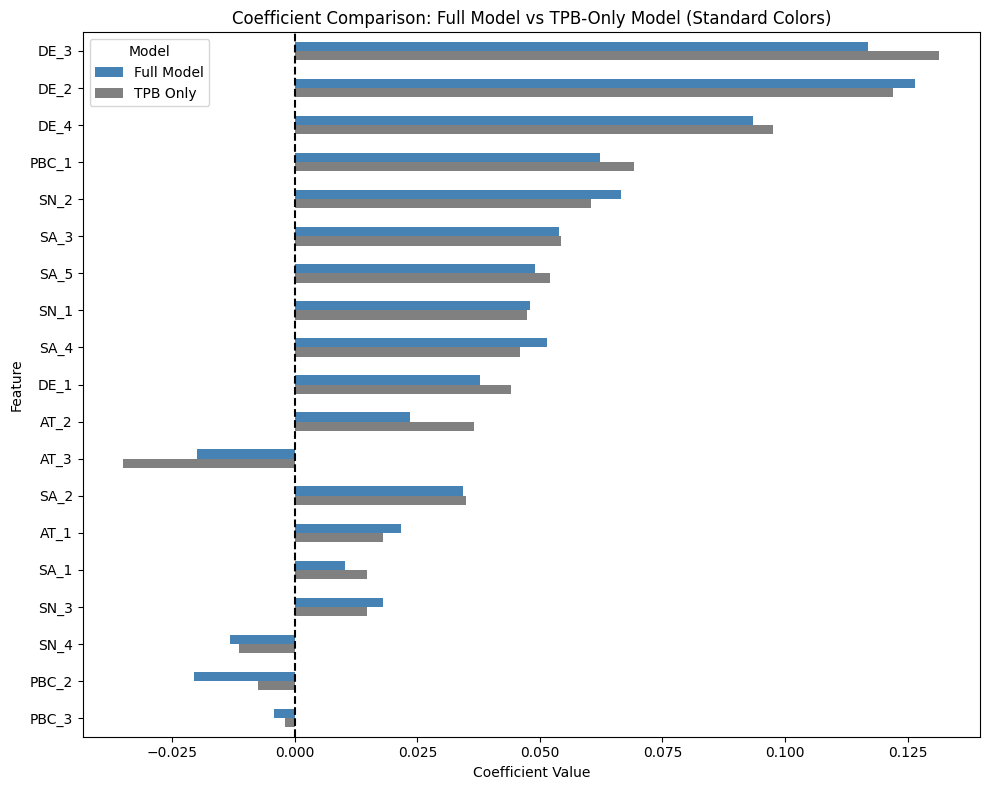

In [7]:
# Create dataframe of coefficients for TPB-only model
tpb_coef_df = pd.DataFrame({
    'Feature': X_tpb.columns,
    'Coefficient': model_tpb.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Add model type column
tpb_coef_df['Model'] = 'TPB Only'

# Prepare full model coefficient dataframe with same structure
full_coef_df = coef_df.copy()
full_coef_df['Model'] = 'Full Model'
full_coef_df = full_coef_df[full_coef_df['Feature'].isin(X_tpb.columns)]  # match only TPB features

# Combine both for comparison
comparison_df = pd.concat([full_coef_df, tpb_coef_df], ignore_index=True)

# Pivot for plotting
comparison_pivot = comparison_df.pivot(index='Feature', columns='Model', values='Coefficient').fillna(0)

# Sort features by TPB impact
comparison_pivot = comparison_pivot.reindex(
    comparison_pivot['TPB Only'].abs().sort_values(ascending=False).index
)

# Plot comparison of coefficients
plt.figure(figsize=(10, 7))
comparison_pivot.plot(kind='barh', figsize=(10, 8), color=['steelblue', 'gray'])  # neutral colors
plt.title('Coefficient Comparison: Full Model vs TPB-Only Model (Standard Colors)')
plt.xlabel('Coefficient Value')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()



**Full vs TPB-Only Comparison Chart**
The bar chart above compares coefficients from both models (full and TPB-only) for the same features.

* Bars closer to the right = more positive impact

* Bars on the left = negative impact


# Top TPB Predictors of Behavioral Intention (TPB-Only Model)


In [8]:
import pandas as pd

# Define the data
data = {
    "Rank": ["1", "2", "3", "4", "5", "6–10"],
    "Feature": ["DE_3", "DE_2", "DE_4", "PBC_1", "SN_2", "SA_3, SA_5, SN_1, SA_4, DE_1"],
    "Coefficient": ["+0.131", "+0.122", "+0.098", "+0.069", "+0.060", "—"],
    "Interpretation": [
        "Desire item 3 is the strongest positive driver",
        "Desire item 2 is a major motivator",
        "Desire item 4 also increases intention",
        "Belief in control over shopping behavior increases BI",
        "Social encouragement positively impacts BI",
        "Moderate positive influences"
    ]
}

# Create DataFrame
tpb_summary_df = pd.DataFrame(data)

# Display the table
tpb_summary_df


,Rank,Feature,Coefficient,Interpretation
0,1,DE_3,+0.131,Desire item 3 is the strongest positive driver
1,2,DE_2,+0.122,Desire item 2 is a major motivator
2,3,DE_4,+0.098,Desire item 4 also increases intention
3,4,PBC_1,+0.069,Belief in control over shopping behavior incre...
4,5,SN_2,+0.060,Social encouragement positively impacts BI
5,6–10,"SA_3, SA_5, SN_1, SA_4, DE_1",—,Moderate positive influences


**Key Insights**
* Desire (DE_2, DE_3, DE_4) is the most dominant factor in both models.

* PBC_1 and SN_2 consistently play important roles — belief in ability and social influence matter.

* Anxiety factors (SA_3, SA_5) also appear positively, suggesting that how shoppers cope with anxiety can influence behavior.

* The TPB-only model reveals sharper coefficients (less diluted), suggesting TPB factors work better without demographic noise.

# Findings

This study explored factors influencing the shopping behavior of Minangkabau women using linear regression models. Two approaches were compared: a full model that incorporated both demographic and psychological variables from the Theory of Planned Behavior (TPB), and a TPB-only model that excluded demographic factors.

The full model showed an R² of 0.333, with desire-related factors (DE_2, DE_3, DE_4) being the most influential, followed by subjective norms (SN_2) and marital status (which negatively impacted intentions). In contrast, the TPB-only model achieved a higher R² of 0.416 and a lower prediction error (RMSE = 0.276), indicating that internal psychological factors—such as desire and perceived behavioral control (PBC_1)—are better predictors of shopping intention than demographic variables.

Visual analyses confirmed the TPB-only model's superior accuracy and clarity. These findings suggest that consumer engagement strategies should prioritize emotional motivation and social support over demographic segmentation, highlighting that shopping intentions are more influenced by mindset than by demographic status.

# Conclusion
In conclusion, shaping consumer behavior requires targeting the mind, not the market segment—emphasizing psychological drivers like desire, confidence, and social influence will lead to more effective, intention-driven shopping experiences.